<a href="https://colab.research.google.com/github/Lisitcyn/ML/blob/Lisitcyn/misis_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lightautoml catboost optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.4/416.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 38.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import optuna
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### EDA

Мы не хотим обозревать колонку id, поэтому дропнем её, колонка has_null тоже бесполезная


In [ ]:
data.drop(columns = ['id', 'has_null'], inplace = True)
test.drop(columns = ['id', 'has_null'], inplace = True)

In [ ]:
data.describe()

,wave,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
count,6702.000000,6626.000000,6620.000000,6702.000000,6639.000000,6639.000000,6631.000000,6631.000000,6631.000000,6624.000000,...,6639.000000,6639.000000,6577.000000,6623.000000,1458.000000,5743.000000,6514.000000,6452.000000,6399.000000,6702.000000
mean,11.350045,26.345306,26.305438,0.398090,3.790029,3.639554,22.463742,17.410780,20.273078,17.463219,...,5.640006,4.344480,0.195326,5.535105,5.615912,3.227181,6.142109,5.218227,0.049383,0.163981
std,6.028025,3.580997,3.528924,0.489541,2.852751,2.802596,12.522203,6.958779,6.678146,6.008834,...,2.595556,2.714417,0.303984,1.730201,4.795396,2.467702,1.839384,2.134206,0.274017,0.370286
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,0.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,11.000000,26.000000,26.000000,0.000000,3.000000,3.000000,20.000000,18.180000,20.000000,18.000000,...,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000,0.000000
75%,15.000000,28.000000,28.000000,1.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000,0.000000
max,21.000000,55.000000,55.000000,1.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wave                           6702 non-null   float64
 1   gender                         6702 non-null   object 
 2   age                            6626 non-null   float64
 3   age_o                          6620 non-null   float64
 4   race                           6651 non-null   object 
 5   race_o                         6645 non-null   object 
 6   samerace                       6702 non-null   int64  
 7   importance_same_race           6639 non-null   float64
 8   importance_same_religion       6639 non-null   float64
 9   field                          6651 non-null   object 
 10  pref_o_attractive              6631 non-null   float64
 11  pref_o_sincere                 6631 non-null   float64
 12  pref_o_intelligence            6631 non-null   f

По количеству значений можно заметить, что большинство фичей - категориальные

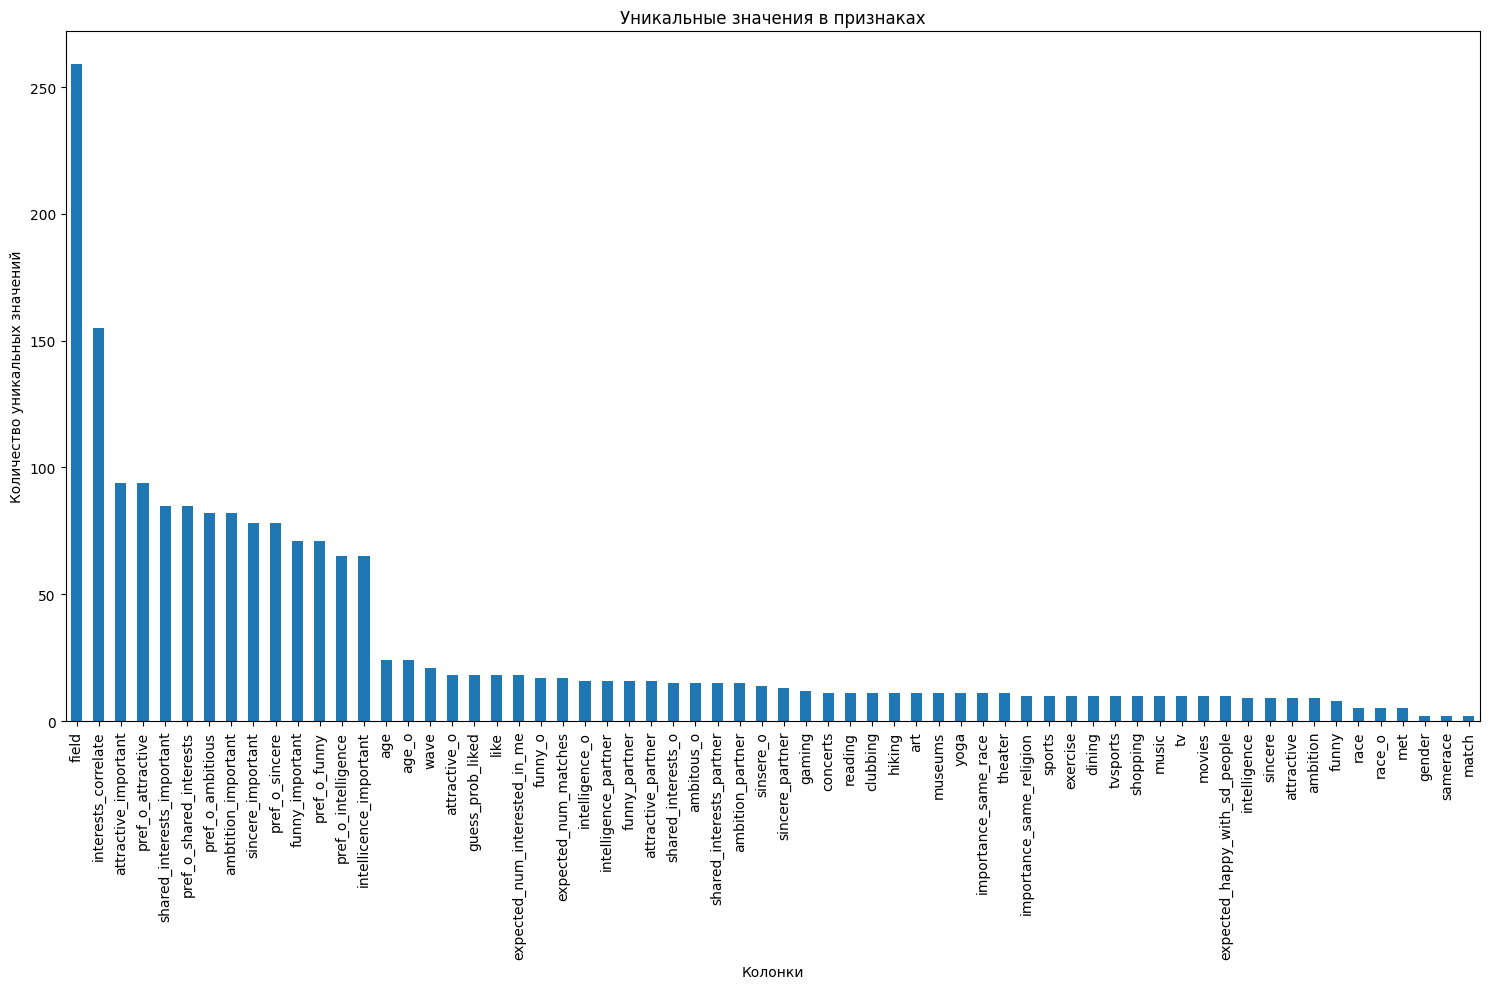

In [ ]:
unique_counts = data.nunique().sort_values(ascending=False)

top_100_cols = unique_counts.head(100)

plt.figure(figsize=(15,10))
top_100_cols.plot(kind='bar')
plt.ylabel('Количество уникальных значений')
plt.xlabel('Колонки')
plt.title('Уникальные значения в признаках')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Видим дизбаланс классов

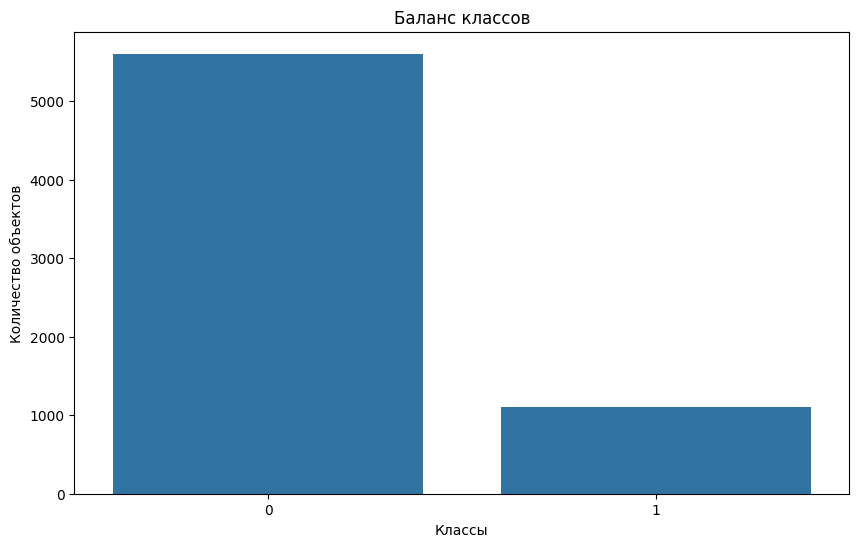

In [ ]:
# соотношение классов
class_counts = data['match'].value_counts()


plt.figure(figsize=(10, 6))
sns.countplot(x='match', data=data)
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.title('Баланс классов')
plt.show()

Посмотрим матрицу корреляции для фичей, у которых с таргетом она больше 0.03 и видим, что много фичей отпадает по этому признаку, а больше всего корреляция по лайку

<ipython-input-82-99db5d8bd7fd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()[target]


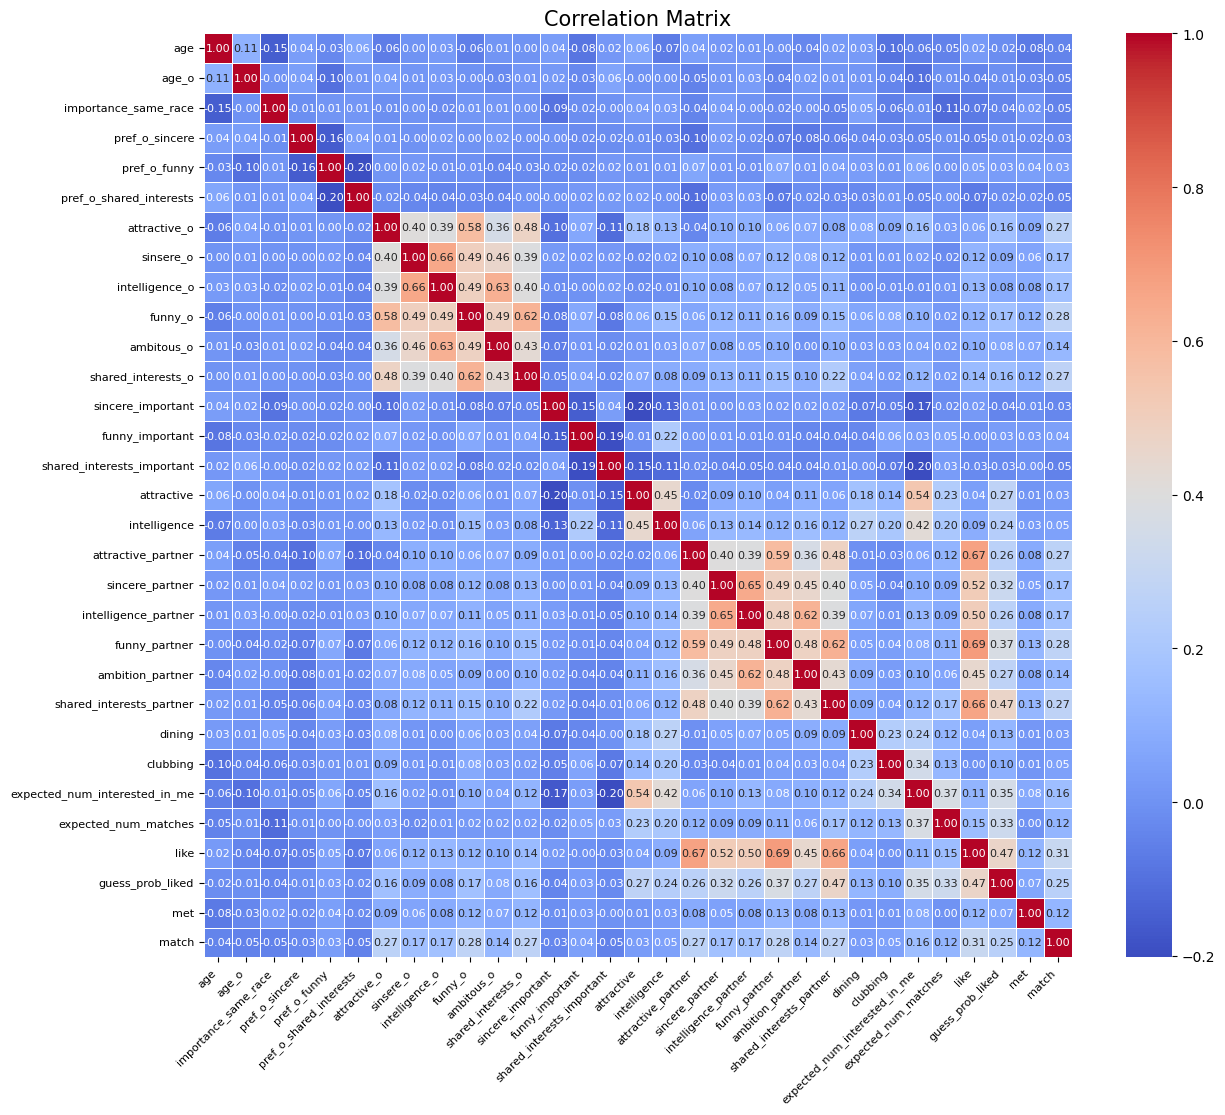

In [ ]:
target = 'match'

correlation_with_target = data.corr()[target]

# Отфильтровываем столбцы с корреляцией меньше 0.05 по модулю
filtered_columns = correlation_with_target[abs(correlation_with_target) >= 0.03].index

# Создаем новый датасет с отфильтрованными столбцами
filtered_data = data[filtered_columns]

# Построение матрицы корреляции для отфильтрованных данных
corr_matrix = filtered_data.corr()

# Увеличение размера фигуры и уменьшение шрифта
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Установка меток
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)

# Установка заголовка
plt.title('Correlation Matrix', fontsize=15)
plt.show()


Посмотрим сколько пропусков

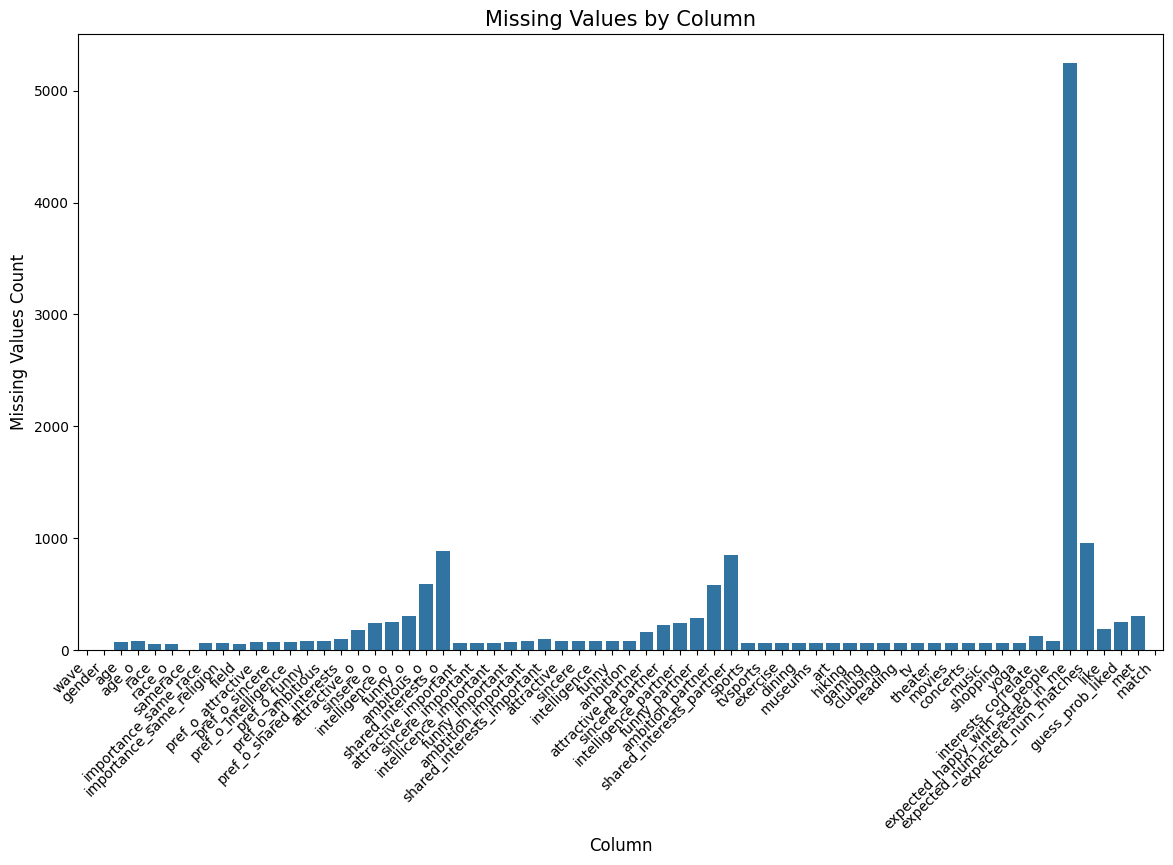

In [ ]:
missing_values = data.isnull().sum()

missing_values_df = pd.DataFrame({'column': missing_values.index, 'missing_count': missing_values.values})

plt.figure(figsize=(14, 8))

sns.barplot(x='column', y='missing_count', data=missing_values_df)

plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)

plt.title('Missing Values by Column', fontsize=15)
plt.xlabel('Column', fontsize=12)
plt.ylabel('Missing Values Count', fontsize=12)

plt.show()

Видно, что в одном столбце почти все пропуски, дропнем его

In [ ]:
data.drop(columns = ['expected_num_interested_in_me'], inplace = True)
test.drop(columns = ['expected_num_interested_in_me'], inplace = True)

Далее будем заполнять пропуски по смыслу

In [ ]:
# Заполнение пропусков
data['age'].fillna(data['age'].mean(), inplace=True)
data['age_o'].fillna(data['age_o'].mean(), inplace=True)

test['age'].fillna(test['age'].mean(), inplace=True)
test['age_o'].fillna(test['age_o'].mean(), inplace=True)

# Для категориальных признаков
data['race'].fillna(-1, inplace=True)
data['race_o'].fillna(-1, inplace=True)
data['field'].fillna(-1, inplace=True)

test['race'].fillna(-1, inplace=True)
test['race_o'].fillna(-1, inplace=True)
test['field'].fillna(-1, inplace=True)

# Для бинарных признаков
data['samerace'].fillna(data['samerace'].mode()[0], inplace=True)
test['samerace'].fillna(test['samerace'].mode()[0], inplace=True)

# Для признаков важности (используем медиану, так как это оценки)
importance_features = [
    'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
    'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
    'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_important',
    'sincere_important', 'intellicence_important', 'funny_important',
    'ambtition_important', 'shared_interests_important'
]

for feature in importance_features:
    data[feature].fillna(data[feature].median(), inplace=True)

for feature in importance_features:
    test[feature].fillna(test[feature].median(), inplace=True)

# Для оценок (также используем медиану)
rating_features = [
    'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o',
    'ambitous_o', 'shared_interests_o', 'attractive', 'sincere',
    'intelligence', 'funny', 'ambition', 'attractive_partner',
    'sincere_partner', 'intelligence_partner', 'funny_partner',
    'ambition_partner', 'shared_interests_partner'
]

for feature in rating_features:
    data[feature].fillna(data[feature].median(), inplace=True)

for feature in rating_features:
    test[feature].fillna(test[feature].median(), inplace=True)

# Для интересов (используем медиану)
interest_features = [
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
    'music', 'shopping', 'yoga'
]

for feature in interest_features:
    data[feature].fillna(data[feature].median(), inplace=True)

for feature in interest_features:
    test[feature].fillna(test[feature].median(), inplace=True)

# Для корреляции интересов (используем медиану)
data['interests_correlate'].fillna(data['interests_correlate'].median(), inplace=True)

test['interests_correlate'].fillna(test['interests_correlate'].median(), inplace=True)

# Для ожиданий (используем 0)
expectation_features = [
    'expected_happy_with_sd_people', 'expected_num_matches'
]

for feature in expectation_features:
    data[feature].fillna(0, inplace=True)

for feature in expectation_features:
    test[feature].fillna(0, inplace=True)

# Для бинарных признаков
binary_features = ['like', 'guess_prob_liked', 'met']

for feature in binary_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

for feature in binary_features:
    test[feature].fillna(test[feature].mode()[0], inplace=True)

In [ ]:
data.isna().sum().sum()

0

### Закодируем категориальные фичи

In [ ]:
for col in data.columns:
  if data[col].dtype == 'object':
    print(col)

gender
race
race_o
field


In [ ]:
categorical_features = ['gender', 'race', 'race_o', 'field']

# Кодирование категориальных признаков с помощью LabelEncoder
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))
    test[feature] = le.fit_transform(test[feature].astype(str))
    label_encoders[feature] = le

# Теперь попробуем бороться с дисбалансом классов

In [ ]:
X = data.drop(columns=['match'])
y = data['match']

# Разделение данных на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Обучение классического CatBoost
catboost_model = CatBoostClassifier(verbose=100)
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
y_pred = catboost_model.predict(X_val)

print("CatBoost - Classification Report:")
print(classification_report(y_val, y_pred))
print(f"CatBoost - Accuracy: {accuracy_score(y_val, y_pred):.4f}")

Learning rate set to 0.047977
0:	learn: 0.6546649	test: 0.6556663	best: 0.6556663 (0)	total: 11.4ms	remaining: 11.4s
100:	learn: 0.2678941	test: 0.3259205	best: 0.3259205 (100)	total: 1.16s	remaining: 10.4s
200:	learn: 0.2197676	test: 0.3196362	best: 0.3193841 (189)	total: 2.25s	remaining: 8.95s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3191351246
bestIteration = 205

Shrink model to first 206 iterations.
CatBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1121
           1       0.69      0.34      0.46       220

    accuracy                           0.87      1341
   macro avg       0.79      0.66      0.69      1341
weighted avg       0.85      0.87      0.85      1341

CatBoost - Accuracy: 0.8673


In [ ]:
# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Обучение CatBoost на данных после SMOTE
catboost_model_smote = CatBoostClassifier(verbose=100)
catboost_model_smote.fit(X_train_smote, y_train_smote, eval_set=(X_val, y_val), early_stopping_rounds=50)
y_pred_smote = catboost_model_smote.predict(X_val)

print("CatBoost with SMOTE - Classification Report:")
print(classification_report(y_val, y_pred_smote))
print(f"CatBoost with SMOTE - Accuracy: {accuracy_score(y_val, y_pred_smote):.4f}")


Learning rate set to 0.054472
0:	learn: 0.6511798	test: 0.6600937	best: 0.6600937 (0)	total: 15.5ms	remaining: 15.5s
100:	learn: 0.1982173	test: 0.3318088	best: 0.3318088 (100)	total: 2.02s	remaining: 18s
200:	learn: 0.1476618	test: 0.3201424	best: 0.3201424 (200)	total: 4.39s	remaining: 17.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.318319789
bestIteration = 245

Shrink model to first 246 iterations.
CatBoost with SMOTE - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1121
           1       0.62      0.42      0.50       220

    accuracy                           0.86      1341
   macro avg       0.76      0.69      0.71      1341
weighted avg       0.85      0.86      0.85      1341

CatBoost with SMOTE - Accuracy: 0.8635


In [ ]:
# Применение undersampling для балансировки классов
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Обучение CatBoost на данных после undersampling
catboost_model_under = CatBoostClassifier(verbose=100)
catboost_model_under.fit(X_train_under, y_train_under, eval_set=(X_val, y_val), early_stopping_rounds=50)
y_pred_under = catboost_model_under.predict(X_val)

print("CatBoost with Undersampling - Classification Report:")
print(classification_report(y_val, y_pred_under))
print(f"CatBoost with Undersampling - Accuracy: {accuracy_score(y_val, y_pred_under):.4f}")

Learning rate set to 0.036427
0:	learn: 0.6817522	test: 0.6835225	best: 0.6835225 (0)	total: 3.09ms	remaining: 3.09s
100:	learn: 0.3759807	test: 0.4902989	best: 0.4902989 (100)	total: 280ms	remaining: 2.49s
200:	learn: 0.2836645	test: 0.4771959	best: 0.4771959 (200)	total: 774ms	remaining: 3.08s
300:	learn: 0.2104632	test: 0.4734248	best: 0.4724262 (286)	total: 1.41s	remaining: 3.27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4716478291
bestIteration = 345

Shrink model to first 346 iterations.
CatBoost with Undersampling - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1121
           1       0.40      0.76      0.53       220

    accuracy                           0.77      1341
   macro avg       0.67      0.77      0.69      1341
weighted avg       0.85      0.77      0.80      1341

CatBoost with Undersampling - Accuracy: 0.7740


In [ ]:
# Обучение классического CatBoost c class_weights
catboost_model = CatBoostClassifier(verbose=100, class_weights = [1,2])
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
y_pred = catboost_model.predict(X_val)

print("CatBoost - Classification Report:")
print(classification_report(y_val, y_pred))
print(f"CatBoost - Accuracy: {accuracy_score(y_val, y_pred):.4f}")

Learning rate set to 0.047977
0:	learn: 0.6696616	test: 0.6707410	best: 0.6707410 (0)	total: 17.2ms	remaining: 17.2s
100:	learn: 0.3419446	test: 0.4269646	best: 0.4268630 (97)	total: 840ms	remaining: 7.47s
200:	learn: 0.2730759	test: 0.4172324	best: 0.4172324 (200)	total: 1.46s	remaining: 5.79s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4153917571
bestIteration = 235

Shrink model to first 236 iterations.
CatBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1121
           1       0.63      0.52      0.57       220

    accuracy                           0.87      1341
   macro avg       0.77      0.73      0.75      1341
weighted avg       0.86      0.87      0.87      1341

CatBoost - Accuracy: 0.8717


Видим, что лучше всего себя показал метод классического катбуста с weight_classes, однако при подборе параметров в конце без него оказалось даже лучше

### Пробуем другие модели

In [ ]:
# Логистическая регрессия
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)

print("Logistic Regression - Classification Report:")
print(classification_report(y_val, y_pred_logreg))
print(f"Logistic Regression - Accuracy: {accuracy_score(y_val, y_pred_logreg):.4f}")

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1121
           1       0.63      0.29      0.40       220

    accuracy                           0.86      1341
   macro avg       0.75      0.63      0.66      1341
weighted avg       0.83      0.86      0.83      1341

Logistic Regression - Accuracy: 0.8553


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)

print("K-Nearest Neighbors - Classification Report:")
print(classification_report(y_val, y_pred_knn))
print(f"K-Nearest Neighbors - Accuracy: {accuracy_score(y_val, y_pred_knn):.4f}")

K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1121
           1       0.32      0.11      0.17       220

    accuracy                           0.82      1341
   macro avg       0.58      0.53      0.53      1341
weighted avg       0.76      0.82      0.78      1341

K-Nearest Neighbors - Accuracy: 0.8151


In [ ]:
# Случайный лес
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

print("Random Forest - Classification Report:")
print(classification_report(y_val, y_pred_rf))
print(f"Random Forest - Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1121
           1       0.72      0.23      0.35       220

    accuracy                           0.86      1341
   macro avg       0.80      0.61      0.63      1341
weighted avg       0.84      0.86      0.83      1341

Random Forest - Accuracy: 0.8591


Поробуем нейронные сети, для этого возьмем библиотеку LightAutoML с их готовой реализацией. Скалирование происходит под капотом, поэтому отдельно это делать не надо, будем использовать две архитектуры, которые лучше всего показывают себя на табличных данных: DenseLight и AutoInt

In [ ]:
automl_NN = TabularAutoML(
    task=Task('binary', metric='accuracy'),
    reader_params={'n_jobs': 4, 'cv' : 2, 'random_state': 42, 'advanced_roles': False},
    debug=True,
    general_params={"use_algos": [['denselight', 'autoint']]},
    nn_params={
        '0' : {
                "n_epochs": 20,
                "bs": 1024,
                # "num_workers": 0,
                # "freeze_defaults": True,
                # "cont_embedder": 'plr',
                # 'cat_embedder': 'weighted',
                # "hidden_size": 32,
                "snap_params": { 'k': 1, 'early_stopping': True, 'patience': 1, 'swa': True }
            },
        '1': {
            "n_epochs": 20,
            "bs": 1024,
            # "num_workers": 0,
            # "freeze_defaults": True,
            # "cont_embedder": 'plr',
            # 'cat_embedder': 'weighted',
            # "hidden_size": 32,
            "snap_params": { 'k': 1, 'early_stopping': True, 'patience': 1, 'swa': True }
        }
    }
)

In [ ]:
oof_pred_NN = automl_NN.fit_predict(data, roles = {'target': 'match'}, verbose = 3)

predictions_NN = automl_NN.predict(test)

[19:25:03] Stdout logging level is INFO3.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO3.


[19:25:03] Task: binary



INFO:lightautoml.automl.presets.base:Task: binary



[19:25:03] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[19:25:03] - time: 3600.00 seconds


INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds


[19:25:03] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[19:25:03] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[19:25:03] Train data shape: (6702, 63)



INFO:lightautoml.reader.base:Train data shape: (6702, 63)



[19:25:03] Layer 1 train process start. Time left 3599.89 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3599.89 secs
DEBUG:lightautoml.ml_algo.dl_model:number of text features: 0 
DEBUG:lightautoml.ml_algo.dl_model:number of categorical features: 0 
DEBUG:lightautoml.ml_algo.dl_model:number of continuous features: 62 


[19:25:03] Start fitting Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'num_workers': 0, 'pin_memory': False, 'max_length': 256, 'is_snap': False, 'input_bn': False, 'max_emb_size': 256, 'bert_name': None, 'pooling': 'cls', 'device': device(type='cuda', index=0), 'use_cont': True, 'use_cat': True, 'use_text': False, 'lang': 'en', 'deterministic': True, 'multigpu': False, 'random_state': 42, 'model': 'denselight', 'model_with_emb': False, 'path_to_save': None, 'verbose_inside': None, 'verbose': 1, 'n_epochs': 20, 'snap_params': {'k': 1, 'early_stopping': True, 'patience': 1, 'swa': True}, 'bs': 256, 'emb_dropout': 0.1, 'emb_ratio': 3, 'opt': 'Adam', 'opt_params': {'lr': 0.0003, 'weight_decay': 0}, 'sch': 'ReduceLROnPlateau', 'scheduler_params': {'patience': 5, 'factor': 0.5, 'min_lr': 1e-05}, 'loss': None, 'loss_params': {}, 'loss_on_logits': True, 'clip_grad': False, 'clip_grad_params': {}, 'init_bias': True, 'dataset': 

[19:25:03] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 =====


[19:25:03] Epoch: 0, train loss: 0.4416389465332031, val loss: 0.43231281638145447, val metric: 0.8358698895851985


INFO3:lightautoml.text.trainer:Epoch: 0, train loss: 0.4416389465332031, val loss: 0.43231281638145447, val metric: 0.8358698895851985


[19:25:04] Epoch: 1, train loss: 0.41915178298950195, val loss: 0.40340492129325867, val metric: 0.8358698895851985


INFO3:lightautoml.text.trainer:Epoch: 1, train loss: 0.41915178298950195, val loss: 0.40340492129325867, val metric: 0.8358698895851985


[19:25:04] Epoch: 2, train loss: 0.39309898018836975, val loss: 0.3767419457435608, val metric: 0.8397493285586393


INFO3:lightautoml.text.trainer:Epoch: 2, train loss: 0.39309898018836975, val loss: 0.3767419457435608, val metric: 0.8397493285586393


[19:25:04] Epoch: 3, train loss: 0.37119653820991516, val loss: 0.36074408888816833, val metric: 0.8454192778275141


INFO3:lightautoml.text.trainer:Epoch: 3, train loss: 0.37119653820991516, val loss: 0.36074408888816833, val metric: 0.8454192778275141


[19:25:04] Epoch: 4, train loss: 0.3550778031349182, val loss: 0.35219040513038635, val metric: 0.8495971351835273


INFO3:lightautoml.text.trainer:Epoch: 4, train loss: 0.3550778031349182, val loss: 0.35219040513038635, val metric: 0.8495971351835273


[19:25:04] Epoch: 5, train loss: 0.34453919529914856, val loss: 0.3431442379951477, val metric: 0.8537749925395405


INFO3:lightautoml.text.trainer:Epoch: 5, train loss: 0.34453919529914856, val loss: 0.3431442379951477, val metric: 0.8537749925395405


[19:25:05] Epoch: 6, train loss: 0.33420440554618835, val loss: 0.33774513006210327, val metric: 0.8537749925395405


INFO3:lightautoml.text.trainer:Epoch: 6, train loss: 0.33420440554618835, val loss: 0.33774513006210327, val metric: 0.8537749925395405


[19:25:05] Epoch: 7, train loss: 0.3220307230949402, val loss: 0.3340041935443878, val metric: 0.855863921217547


INFO3:lightautoml.text.trainer:Epoch: 7, train loss: 0.3220307230949402, val loss: 0.3340041935443878, val metric: 0.855863921217547


[19:25:05] Epoch: 8, train loss: 0.3180173337459564, val loss: 0.3322316110134125, val metric: 0.8567591763652641


INFO3:lightautoml.text.trainer:Epoch: 8, train loss: 0.3180173337459564, val loss: 0.3322316110134125, val metric: 0.8567591763652641


[19:25:05] Epoch: 9, train loss: 0.3078044056892395, val loss: 0.32586148381233215, val metric: 0.8588481050432707


INFO3:lightautoml.text.trainer:Epoch: 9, train loss: 0.3078044056892395, val loss: 0.32586148381233215, val metric: 0.8588481050432707


[19:25:05] Epoch: 10, train loss: 0.30074766278266907, val loss: 0.3243357241153717, val metric: 0.8600417785735601


INFO3:lightautoml.text.trainer:Epoch: 10, train loss: 0.30074766278266907, val loss: 0.3243357241153717, val metric: 0.8600417785735601


[19:25:05] Epoch: 11, train loss: 0.2978452444076538, val loss: 0.3236367404460907, val metric: 0.8639212175470009


INFO3:lightautoml.text.trainer:Epoch: 11, train loss: 0.2978452444076538, val loss: 0.3236367404460907, val metric: 0.8639212175470009


[19:25:05] Epoch: 12, train loss: 0.28729304671287537, val loss: 0.32085728645324707, val metric: 0.8654133094598627


INFO3:lightautoml.text.trainer:Epoch: 12, train loss: 0.28729304671287537, val loss: 0.32085728645324707, val metric: 0.8654133094598627


[19:25:06] Epoch: 13, train loss: 0.2789955735206604, val loss: 0.32000860571861267, val metric: 0.8639212175470009


INFO3:lightautoml.text.trainer:Epoch: 13, train loss: 0.2789955735206604, val loss: 0.32000860571861267, val metric: 0.8639212175470009


[19:25:06] Epoch: 14, train loss: 0.2721790075302124, val loss: 0.3159714639186859, val metric: 0.8672038197552969


INFO3:lightautoml.text.trainer:Epoch: 14, train loss: 0.2721790075302124, val loss: 0.3159714639186859, val metric: 0.8672038197552969


[19:25:06] Epoch: 15, train loss: 0.2699877619743347, val loss: 0.3170836865901947, val metric: 0.8624291256341391


INFO3:lightautoml.text.trainer:Epoch: 15, train loss: 0.2699877619743347, val loss: 0.3170836865901947, val metric: 0.8624291256341391


[19:25:06] Early stopping: val loss: 0.3159714639186859, val metric: 0.8672038197552969


INFO3:lightautoml.text.trainer:Early stopping: val loss: 0.3159714639186859, val metric: 0.8672038197552969


[19:25:06] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 =====


[19:25:06] Epoch: 0, train loss: 0.44227248430252075, val loss: 0.42821502685546875, val metric: 0.8361683079677709


INFO3:lightautoml.text.trainer:Epoch: 0, train loss: 0.44227248430252075, val loss: 0.42821502685546875, val metric: 0.8361683079677709


[19:25:06] Epoch: 1, train loss: 0.41741400957107544, val loss: 0.40198832750320435, val metric: 0.8355714712026261


INFO3:lightautoml.text.trainer:Epoch: 1, train loss: 0.41741400957107544, val loss: 0.40198832750320435, val metric: 0.8355714712026261


[19:25:07] Epoch: 2, train loss: 0.386243999004364, val loss: 0.3824041783809662, val metric: 0.8442256042972247


INFO3:lightautoml.text.trainer:Epoch: 2, train loss: 0.386243999004364, val loss: 0.3824041783809662, val metric: 0.8442256042972247


[19:25:07] Epoch: 3, train loss: 0.36791086196899414, val loss: 0.3712994158267975, val metric: 0.8495971351835273


INFO3:lightautoml.text.trainer:Epoch: 3, train loss: 0.36791086196899414, val loss: 0.3712994158267975, val metric: 0.8495971351835273


[19:25:07] Epoch: 4, train loss: 0.35664045810699463, val loss: 0.3660240173339844, val metric: 0.8528797373918233


INFO3:lightautoml.text.trainer:Epoch: 4, train loss: 0.35664045810699463, val loss: 0.3660240173339844, val metric: 0.8528797373918233


[19:25:07] Epoch: 5, train loss: 0.3460226058959961, val loss: 0.3600684106349945, val metric: 0.8555655028349747


INFO3:lightautoml.text.trainer:Epoch: 5, train loss: 0.3460226058959961, val loss: 0.3600684106349945, val metric: 0.8555655028349747


[19:25:07] Epoch: 6, train loss: 0.34309622645378113, val loss: 0.3548370897769928, val metric: 0.8555655028349747


INFO3:lightautoml.text.trainer:Epoch: 6, train loss: 0.34309622645378113, val loss: 0.3548370897769928, val metric: 0.8555655028349747


[19:25:07] Epoch: 7, train loss: 0.33335012197494507, val loss: 0.35097184777259827, val metric: 0.8549686660698299


INFO3:lightautoml.text.trainer:Epoch: 7, train loss: 0.33335012197494507, val loss: 0.35097184777259827, val metric: 0.8549686660698299


[19:25:07] Epoch: 8, train loss: 0.33154457807540894, val loss: 0.34607619047164917, val metric: 0.8567591763652641


INFO3:lightautoml.text.trainer:Epoch: 8, train loss: 0.33154457807540894, val loss: 0.34607619047164917, val metric: 0.8567591763652641


[19:25:08] Epoch: 9, train loss: 0.3216087222099304, val loss: 0.34334421157836914, val metric: 0.8591465234258431


INFO3:lightautoml.text.trainer:Epoch: 9, train loss: 0.3216087222099304, val loss: 0.34334421157836914, val metric: 0.8591465234258431


[19:25:08] Epoch: 10, train loss: 0.3166176378726959, val loss: 0.3404152989387512, val metric: 0.8612354521038496


INFO3:lightautoml.text.trainer:Epoch: 10, train loss: 0.3166176378726959, val loss: 0.3404152989387512, val metric: 0.8612354521038496


[19:25:08] Epoch: 11, train loss: 0.3078283965587616, val loss: 0.3385232388973236, val metric: 0.8618322888689943


INFO3:lightautoml.text.trainer:Epoch: 11, train loss: 0.3078283965587616, val loss: 0.3385232388973236, val metric: 0.8618322888689943


[19:25:08] Epoch: 12, train loss: 0.3009377121925354, val loss: 0.3368808329105377, val metric: 0.8591465234258431


INFO3:lightautoml.text.trainer:Epoch: 12, train loss: 0.3009377121925354, val loss: 0.3368808329105377, val metric: 0.8591465234258431


[19:25:08] Epoch: 13, train loss: 0.3022840619087219, val loss: 0.33538123965263367, val metric: 0.8600417785735601


INFO3:lightautoml.text.trainer:Epoch: 13, train loss: 0.3022840619087219, val loss: 0.33538123965263367, val metric: 0.8600417785735601


[19:25:08] Epoch: 14, train loss: 0.29168006777763367, val loss: 0.33278700709342957, val metric: 0.8609370337212773


INFO3:lightautoml.text.trainer:Epoch: 14, train loss: 0.29168006777763367, val loss: 0.33278700709342957, val metric: 0.8609370337212773


[19:25:08] Epoch: 15, train loss: 0.2829793095588684, val loss: 0.33279067277908325, val metric: 0.8603401969561325


INFO3:lightautoml.text.trainer:Epoch: 15, train loss: 0.2829793095588684, val loss: 0.33279067277908325, val metric: 0.8603401969561325


[19:25:08] Early stopping: val loss: 0.33278700709342957, val metric: 0.8609370337212773


INFO3:lightautoml.text.trainer:Early stopping: val loss: 0.33278700709342957, val metric: 0.8609370337212773


[19:25:09] Fitting Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 finished. score = 0.864070426738287


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 finished. score = 0.864070426738287


[19:25:09] Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0 fitting and predicting completed
DEBUG:lightautoml.ml_algo.dl_model:number of text features: 0 
DEBUG:lightautoml.ml_algo.dl_model:number of categorical features: 0 
DEBUG:lightautoml.ml_algo.dl_model:number of continuous features: 62 


[19:25:09] Start fitting Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'num_workers': 0, 'pin_memory': False, 'max_length': 256, 'is_snap': False, 'input_bn': False, 'max_emb_size': 256, 'bert_name': None, 'pooling': 'cls', 'device': device(type='cuda', index=0), 'use_cont': True, 'use_cat': True, 'use_text': False, 'lang': 'en', 'deterministic': True, 'multigpu': False, 'random_state': 42, 'model': 'autoint', 'model_with_emb': False, 'path_to_save': None, 'verbose_inside': None, 'verbose': 1, 'n_epochs': 20, 'snap_params': {'k': 1, 'early_stopping': True, 'patience': 1, 'swa': True}, 'bs': 256, 'emb_dropout': 0.1, 'emb_ratio': 3, 'opt': 'Adam', 'opt_params': {'lr': 0.0003, 'weight_decay': 0}, 'sch': 'ReduceLROnPlateau', 'scheduler_params': {'patience': 5, 'factor': 0.5, 'min_lr': 1e-05}, 'loss': None, 'loss_params': {}, 'loss_on_logits': True, 'clip_grad': False, 'clip_grad_params': {}, 'init_bias': True, 'dataset': 'Unive

[19:25:09] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 =====


[19:25:09] Epoch: 0, train loss: 0.4426276385784149, val loss: 0.43726786971092224, val metric: 0.8358698895851985


INFO3:lightautoml.text.trainer:Epoch: 0, train loss: 0.4426276385784149, val loss: 0.43726786971092224, val metric: 0.8358698895851985


[19:25:10] Epoch: 1, train loss: 0.42808833718299866, val loss: 0.4176715314388275, val metric: 0.8358698895851985


INFO3:lightautoml.text.trainer:Epoch: 1, train loss: 0.42808833718299866, val loss: 0.4176715314388275, val metric: 0.8358698895851985


[19:25:11] Epoch: 2, train loss: 0.4074864089488983, val loss: 0.39728274941444397, val metric: 0.8358698895851985


INFO3:lightautoml.text.trainer:Epoch: 2, train loss: 0.4074864089488983, val loss: 0.39728274941444397, val metric: 0.8358698895851985


[19:25:12] Epoch: 3, train loss: 0.38519588112831116, val loss: 0.3717195391654968, val metric: 0.8424350940017905


INFO3:lightautoml.text.trainer:Epoch: 3, train loss: 0.38519588112831116, val loss: 0.3717195391654968, val metric: 0.8424350940017905


[19:25:13] Epoch: 4, train loss: 0.36244991421699524, val loss: 0.3705436885356903, val metric: 0.8412414204715011


INFO3:lightautoml.text.trainer:Epoch: 4, train loss: 0.36244991421699524, val loss: 0.3705436885356903, val metric: 0.8412414204715011


[19:25:14] Epoch: 5, train loss: 0.34011080861091614, val loss: 0.35978221893310547, val metric: 0.8466129513578037


INFO3:lightautoml.text.trainer:Epoch: 5, train loss: 0.34011080861091614, val loss: 0.35978221893310547, val metric: 0.8466129513578037


[19:25:14] Epoch: 6, train loss: 0.3119160830974579, val loss: 0.3471693694591522, val metric: 0.8546702476872575


INFO3:lightautoml.text.trainer:Epoch: 6, train loss: 0.3119160830974579, val loss: 0.3471693694591522, val metric: 0.8546702476872575


[19:25:15] Epoch: 7, train loss: 0.2942782938480377, val loss: 0.34021592140197754, val metric: 0.8600417785735601


INFO3:lightautoml.text.trainer:Epoch: 7, train loss: 0.2942782938480377, val loss: 0.34021592140197754, val metric: 0.8600417785735601


[19:25:16] Epoch: 8, train loss: 0.27189674973487854, val loss: 0.3395877182483673, val metric: 0.8579528498955535


INFO3:lightautoml.text.trainer:Epoch: 8, train loss: 0.27189674973487854, val loss: 0.3395877182483673, val metric: 0.8579528498955535


[19:25:16] Epoch: 9, train loss: 0.253431111574173, val loss: 0.3373042047023773, val metric: 0.8570575947478365


INFO3:lightautoml.text.trainer:Epoch: 9, train loss: 0.253431111574173, val loss: 0.3373042047023773, val metric: 0.8570575947478365


[19:25:17] Epoch: 10, train loss: 0.23572418093681335, val loss: 0.3452063202857971, val metric: 0.8531781557743957


INFO3:lightautoml.text.trainer:Epoch: 10, train loss: 0.23572418093681335, val loss: 0.3452063202857971, val metric: 0.8531781557743957


[19:25:17] Early stopping: val loss: 0.3373042047023773, val metric: 0.8570575947478365


INFO3:lightautoml.text.trainer:Early stopping: val loss: 0.3373042047023773, val metric: 0.8570575947478365


[19:25:18] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 =====


[19:25:18] Epoch: 0, train loss: 0.4432350993156433, val loss: 0.4338846206665039, val metric: 0.8361683079677709


INFO3:lightautoml.text.trainer:Epoch: 0, train loss: 0.4432350993156433, val loss: 0.4338846206665039, val metric: 0.8361683079677709


[19:25:19] Epoch: 1, train loss: 0.4301128685474396, val loss: 0.41769617795944214, val metric: 0.8361683079677709


INFO3:lightautoml.text.trainer:Epoch: 1, train loss: 0.4301128685474396, val loss: 0.41769617795944214, val metric: 0.8361683079677709


[19:25:20] Epoch: 2, train loss: 0.41081613302230835, val loss: 0.4004250168800354, val metric: 0.8361683079677709


INFO3:lightautoml.text.trainer:Epoch: 2, train loss: 0.41081613302230835, val loss: 0.4004250168800354, val metric: 0.8361683079677709


[19:25:20] Epoch: 3, train loss: 0.39005234837532043, val loss: 0.3804572522640228, val metric: 0.8367651447329155


INFO3:lightautoml.text.trainer:Epoch: 3, train loss: 0.39005234837532043, val loss: 0.3804572522640228, val metric: 0.8367651447329155


[19:25:21] Epoch: 4, train loss: 0.3672129809856415, val loss: 0.37284016609191895, val metric: 0.8400477469412115


INFO3:lightautoml.text.trainer:Epoch: 4, train loss: 0.3672129809856415, val loss: 0.37284016609191895, val metric: 0.8400477469412115


[19:25:22] Epoch: 5, train loss: 0.34612300992012024, val loss: 0.36657172441482544, val metric: 0.8421366756192181


INFO3:lightautoml.text.trainer:Epoch: 5, train loss: 0.34612300992012024, val loss: 0.36657172441482544, val metric: 0.8421366756192181


[19:25:22] Epoch: 6, train loss: 0.3263113796710968, val loss: 0.35673999786376953, val metric: 0.8487018800358102


INFO3:lightautoml.text.trainer:Epoch: 6, train loss: 0.3263113796710968, val loss: 0.35673999786376953, val metric: 0.8487018800358102


[19:25:23] Epoch: 7, train loss: 0.30517658591270447, val loss: 0.3447379767894745, val metric: 0.8609370337212773


INFO3:lightautoml.text.trainer:Epoch: 7, train loss: 0.30517658591270447, val loss: 0.3447379767894745, val metric: 0.8609370337212773


[19:25:24] Epoch: 8, train loss: 0.2827889621257782, val loss: 0.3403283655643463, val metric: 0.8588481050432707


INFO3:lightautoml.text.trainer:Epoch: 8, train loss: 0.2827889621257782, val loss: 0.3403283655643463, val metric: 0.8588481050432707


[19:25:25] Epoch: 9, train loss: 0.2576844096183777, val loss: 0.34460243582725525, val metric: 0.8582512682781259


INFO3:lightautoml.text.trainer:Epoch: 9, train loss: 0.2576844096183777, val loss: 0.34460243582725525, val metric: 0.8582512682781259


[19:25:26] Early stopping: val loss: 0.3403283655643463, val metric: 0.8588481050432707


INFO3:lightautoml.text.trainer:Early stopping: val loss: 0.3403283655643463, val metric: 0.8588481050432707


[19:25:26] Fitting Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 finished. score = 0.8579528498955535


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 finished. score = 0.8579528498955535


[19:25:26] Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1 fitting and predicting completed


[19:25:26] Time left 3576.87 secs



INFO:lightautoml.automl.base:Time left 3576.87 secs



[19:25:26] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[19:25:26] Blending: optimization starts with equal weights and score 0.8655625186511489


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score 0.8655625186511489


[19:25:26] Blending: iteration 0: score = 0.8669054013727245, weights = [0.76393205 0.23606798]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = 0.8669054013727245, weights = [0.76393205 0.23606798]


[19:25:26] Blending: iteration 1: score = 0.8669054013727245, weights = [0.76393205 0.23606798]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = 0.8669054013727245, weights = [0.76393205 0.23606798]


[19:25:26] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[19:25:26] Automl preset training completed in 23.20 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 23.20 seconds



[19:25:26] Model description:
Final prediction for new objects (level 0) = 
	 0.76393 * (2 averaged models Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0) +
	 0.23607 * (2 averaged models Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.76393 * (2 averaged models Lvl_0_Pipe_0_Mod_0_TorchNN_denselight_0) +
	 0.23607 * (2 averaged models Lvl_0_Pipe_0_Mod_1_TorchNN_autoint_1) 



Получаем, что бустинги, ожидаемо, дали лучший скор


### Подберем параметры для бустинга с помощью оптуны и сделаем сабмит

In [ ]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5, log=True),
        'depth': trial.suggest_int('depth', 3, 10),
        'class_weights' : [1, 2]
    }

    model = CatBoostClassifier(**param, task_type = 'GPU')
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50,verbose = 500)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

print("Number of finished trials:", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {:.4f}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-30288599-0b2d-42bc-a511-3abb0d3525c9


0:	learn: 0.6525657	test: 0.6545524	best: 0.6545524 (0)	total: 434ms	remaining: 13m 39s
bestTest = 0.4225645682
bestIteration = 93
Shrink model to first 94 iterations.


INFO:optuna.study.study:Trial 0 finished with value: 0.8538404175988069 and parameters: {'iterations': 1888, 'learning_rate': 0.06562334874140467, 'depth': 10}. Best is trial 0 with value: 0.8538404175988069.


0:	learn: 0.6858139	test: 0.6861464	best: 0.6861464 (0)	total: 67ms	remaining: 1m 13s
500:	learn: 0.3125987	test: 0.4201541	best: 0.4201541 (500)	total: 37.3s	remaining: 44.6s
bestTest = 0.4164735255
bestIteration = 768
Shrink model to first 769 iterations.


INFO:optuna.study.study:Trial 1 finished with value: 0.8590604026845637 and parameters: {'iterations': 1100, 'learning_rate': 0.011355800119206647, 'depth': 8}. Best is trial 1 with value: 0.8590604026845637.


0:	learn: 0.6757354	test: 0.6765324	best: 0.6765324 (0)	total: 153ms	remaining: 2m 25s
bestTest = 0.4151019745
bestIteration = 361
Shrink model to first 362 iterations.


INFO:optuna.study.study:Trial 2 finished with value: 0.8642803877703207 and parameters: {'iterations': 953, 'learning_rate': 0.027339490113808467, 'depth': 8}. Best is trial 2 with value: 0.8642803877703207.


0:	learn: 0.6896032	test: 0.6897137	best: 0.6897137 (0)	total: 27.2ms	remaining: 42.9s
500:	learn: 0.3868936	test: 0.4337012	best: 0.4337012 (500)	total: 15.1s	remaining: 32.6s
1000:	learn: 0.3514413	test: 0.4226162	best: 0.4226162 (1000)	total: 28.9s	remaining: 16.7s
1500:	learn: 0.3295084	test: 0.4183874	best: 0.4183675 (1499)	total: 42.7s	remaining: 2.28s
1580:	learn: 0.3260634	test: 0.4175702	best: 0.4175595 (1578)	total: 44.8s	remaining: 0us
bestTest = 0.417559529
bestIteration = 1578
Shrink model to first 1579 iterations.


INFO:optuna.study.study:Trial 3 finished with value: 0.8523489932885906 and parameters: {'iterations': 1581, 'learning_rate': 0.00560194120444755, 'depth': 6}. Best is trial 2 with value: 0.8642803877703207.


0:	learn: 0.6834059	test: 0.6837163	best: 0.6837163 (0)	total: 18ms	remaining: 24s
500:	learn: 0.3733793	test: 0.4236092	best: 0.4235881 (495)	total: 10.6s	remaining: 17.6s
1000:	learn: 0.3389865	test: 0.4169040	best: 0.4168383 (997)	total: 20.8s	remaining: 6.86s
bestTest = 0.415897973
bestIteration = 1139
Shrink model to first 1140 iterations.


INFO:optuna.study.study:Trial 4 finished with value: 0.8575689783743475 and parameters: {'iterations': 1332, 'learning_rate': 0.017058015981361807, 'depth': 4}. Best is trial 2 with value: 0.8642803877703207.


0:	learn: 0.6915547	test: 0.6916296	best: 0.6916296 (0)	total: 234ms	remaining: 4m 57s
500:	learn: 0.4132134	test: 0.4554832	best: 0.4554832 (500)	total: 1m 43s	remaining: 2m 38s
1000:	learn: 0.3513734	test: 0.4309392	best: 0.4309392 (1000)	total: 3m 38s	remaining: 58.6s
1268:	learn: 0.3306876	test: 0.4263130	best: 0.4263130 (1268)	total: 4m 39s	remaining: 0us
bestTest = 0.4263129714
bestIteration = 1268


INFO:optuna.study.study:Trial 5 finished with value: 0.8523489932885906 and parameters: {'iterations': 1269, 'learning_rate': 0.002437108231833965, 'depth': 10}. Best is trial 2 with value: 0.8642803877703207.


0:	learn: 0.6891429	test: 0.6892490	best: 0.6892490 (0)	total: 69ms	remaining: 1m 5s
500:	learn: 0.3931436	test: 0.4333038	best: 0.4333038 (500)	total: 11.9s	remaining: 10.6s
947:	learn: 0.3674521	test: 0.4244702	best: 0.4244702 (947)	total: 22.6s	remaining: 0us
bestTest = 0.4244702258
bestIteration = 947


INFO:optuna.study.study:Trial 6 finished with value: 0.8493661446681581 and parameters: {'iterations': 948, 'learning_rate': 0.006390006908757347, 'depth': 5}. Best is trial 2 with value: 0.8642803877703207.


0:	learn: 0.4984095	test: 0.5112173	best: 0.5112173 (0)	total: 66.6ms	remaining: 1m 3s
bestTest = 0.4343448617
bestIteration = 23
Shrink model to first 24 iterations.


INFO:optuna.study.study:Trial 7 finished with value: 0.8508575689783744 and parameters: {'iterations': 947, 'learning_rate': 0.46587910089718576, 'depth': 8}. Best is trial 2 with value: 0.8642803877703207.


0:	learn: 0.6521633	test: 0.6536514	best: 0.6536514 (0)	total: 112ms	remaining: 3m 19s
bestTest = 0.4142851747
bestIteration = 255
Shrink model to first 256 iterations.


INFO:optuna.study.study:Trial 8 finished with value: 0.8635346756152126 and parameters: {'iterations': 1776, 'learning_rate': 0.06824812993515117, 'depth': 7}. Best is trial 2 with value: 0.8642803877703207.


0:	learn: 0.5523681	test: 0.5584845	best: 0.5584845 (0)	total: 17.7ms	remaining: 28.7s
bestTest = 0.4236984693
bestIteration = 70
Shrink model to first 71 iterations.


INFO:optuna.study.study:Trial 9 finished with value: 0.8508575689783744 and parameters: {'iterations': 1627, 'learning_rate': 0.31529094352201403, 'depth': 4}. Best is trial 2 with value: 0.8642803877703207.


0:	learn: 0.6573083	test: 0.6589810	best: 0.6589810 (0)	total: 67.8ms	remaining: 38.2s
bestTest = 0.4154458593
bestIteration = 154
Shrink model to first 155 iterations.


INFO:optuna.study.study:Trial 10 finished with value: 0.8657718120805369 and parameters: {'iterations': 565, 'learning_rate': 0.057808532113265525, 'depth': 8}. Best is trial 10 with value: 0.8657718120805369.


0:	learn: 0.6593080	test: 0.6608839	best: 0.6608839 (0)	total: 69.1ms	remaining: 40.5s
bestTest = 0.4144710172
bestIteration = 173
Shrink model to first 174 iterations.


INFO:optuna.study.study:Trial 11 finished with value: 0.8620432513049963 and parameters: {'iterations': 587, 'learning_rate': 0.05441810974126081, 'depth': 8}. Best is trial 10 with value: 0.8657718120805369.


0:	learn: 0.6134913	test: 0.6176295	best: 0.6176295 (0)	total: 136ms	remaining: 1m 8s
bestTest = 0.4280670381
bestIteration = 41
Shrink model to first 42 iterations.


INFO:optuna.study.study:Trial 12 finished with value: 0.8538404175988069 and parameters: {'iterations': 509, 'learning_rate': 0.1374864251436957, 'depth': 9}. Best is trial 10 with value: 0.8657718120805369.


0:	learn: 0.6734455	test: 0.6740813	best: 0.6740813 (0)	total: 27.3ms	remaining: 20.3s
bestTest = 0.4173693464
bestIteration = 382
Shrink model to first 383 iterations.


INFO:optuna.study.study:Trial 13 finished with value: 0.8627889634601044 and parameters: {'iterations': 745, 'learning_rate': 0.0318215218842186, 'depth': 6}. Best is trial 10 with value: 0.8657718120805369.


0:	learn: 0.6210383	test: 0.6238578	best: 0.6238578 (0)	total: 40.1ms	remaining: 31.4s
bestTest = 0.4128514937
bestIteration = 82
Shrink model to first 83 iterations.


INFO:optuna.study.study:Trial 14 finished with value: 0.8583146905294556 and parameters: {'iterations': 784, 'learning_rate': 0.12628339834811675, 'depth': 7}. Best is trial 10 with value: 0.8657718120805369.


Number of finished trials: 15
Best trial:
  Value: 0.8658
  Params: 
    iterations: 565
    learning_rate: 0.057808532113265525
    depth: 8


In [ ]:
#0.8740
param = {
        'iterations': 1410,
        'learning_rate': 0.11900186231942744,
        'depth': 7

    }
model = CatBoostClassifier(**param)
model.fit(X,y,verbose=500)

0:	learn: 0.6068258	total: 5.79ms	remaining: 8.16s
500:	learn: 0.0239564	total: 2.79s	remaining: 5.07s
1000:	learn: 0.0060224	total: 7.24s	remaining: 2.96s
1409:	learn: 0.0034917	total: 13.4s	remaining: 0us


In [ ]:
subm = pd.read_csv('sample_submission.csv')
predictions = model.predict(test)

In [ ]:
subm['target'] = predictions
subm.to_csv('submission.csv', index=False)

***Результат:***

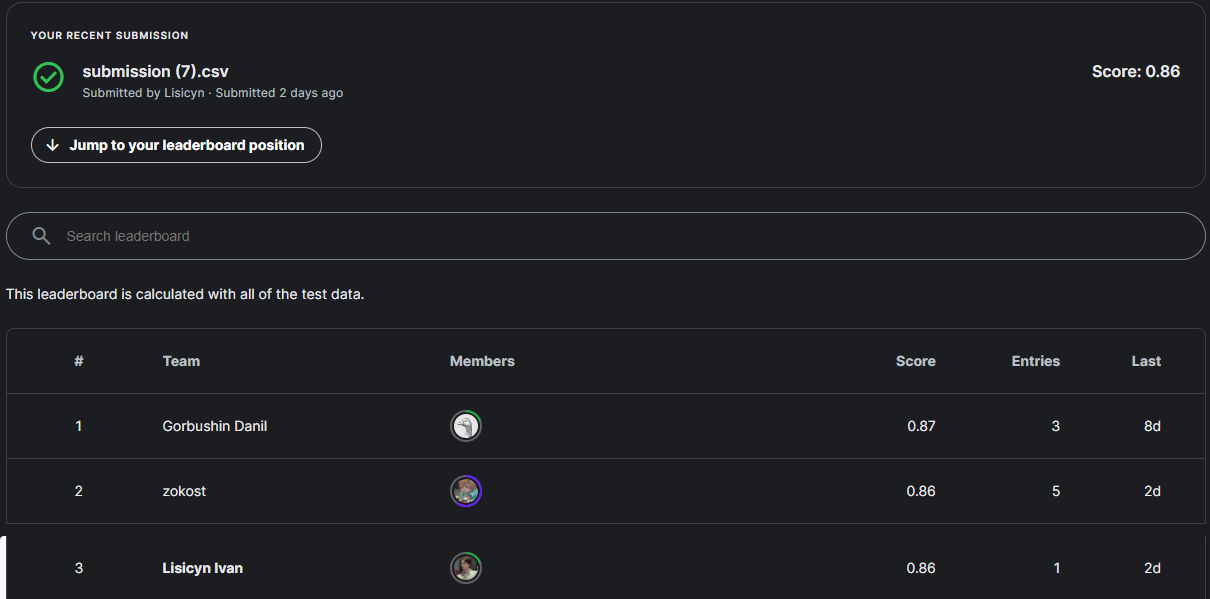